Found 1156 images belonging to 9 classes.
Found 502 images belonging to 9 classes.
Epoch 1/10
37/37 [==============================] - 29s 757ms/step - loss: 2.8777 - accuracy: 0.2561 - val_loss: 1.4533 - val_accuracy: 0.4542
Epoch 2/10
37/37 [==============================] - 34s 928ms/step - loss: 1.1298 - accuracy: 0.5986 - val_loss: 1.1968 - val_accuracy: 0.5837
Epoch 3/10
37/37 [==============================] - 34s 899ms/step - loss: 0.7651 - accuracy: 0.7457 - val_loss: 0.7538 - val_accuracy: 0.7390
Epoch 4/10
37/37 [==============================] - 33s 888ms/step - loss: 0.5500 - accuracy: 0.8296 - val_loss: 0.6356 - val_accuracy: 0.7948
Epoch 5/10
37/37 [==============================] - 33s 900ms/step - loss: 0.3514 - accuracy: 0.8893 - val_loss: 1.6441 - val_accuracy: 0.5737
Epoch 6/10
37/37 [==============================] - 35s 941ms/step - loss: 0.4778 - accuracy: 0.8322 - val_loss: 0.9298 - val_accuracy: 0.7131
Epoch 7/10
37/37 [==============================] - 35s 949

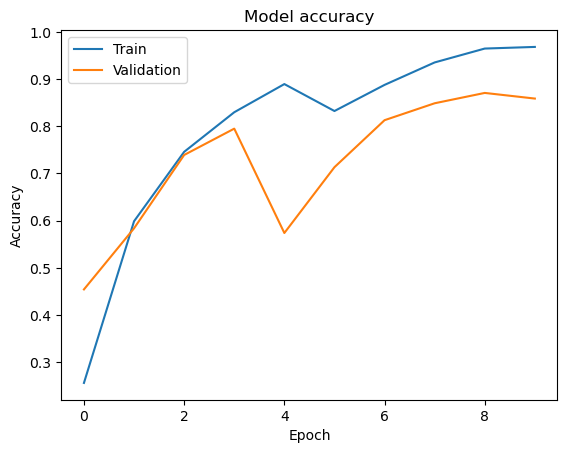

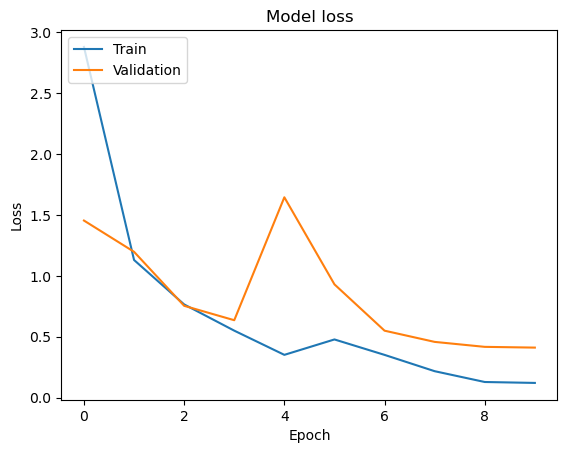

1/1 [==============================] - 0s 200ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      0.75      0.85        53
           2       0.83      0.85      0.84        40
           3       0.84      0.80      0.82        66
           4       0.82      0.80      0.81        50
           5       0.79      1.00      0.88        44
           6       0.84      0.96      0.90        51
           7       0.87      0.89      0.88        75
           8       0.80      0.70      0.74        50

    accuracy                           0.86       480
   macro avg       0.86      0.86      0.86       480
weighted avg       0.86      0.86      0.86       480



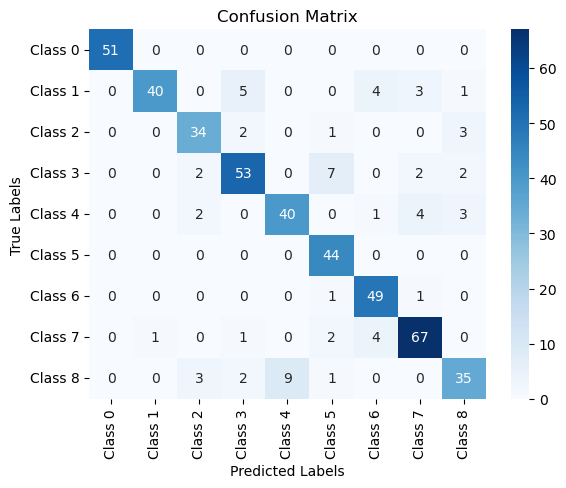

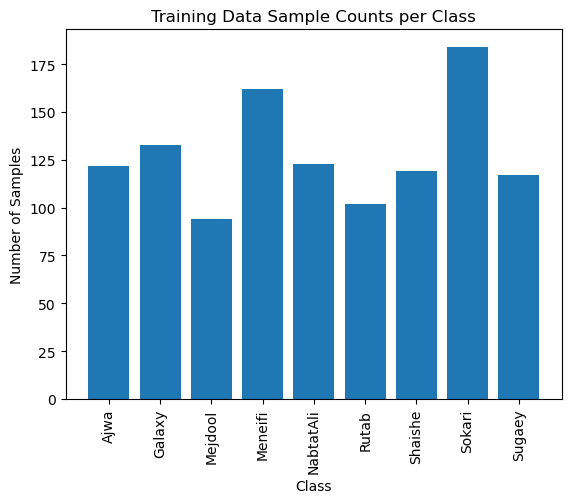

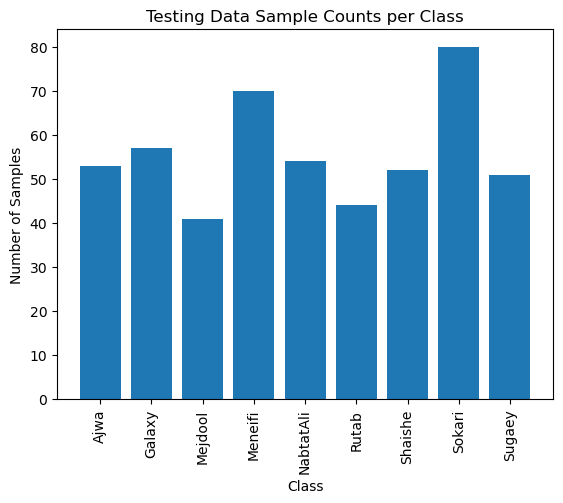

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# Set the paths to the train and test folders
train_dir = 'D:/Date_Fruit_Image_Dataset_Splitted_Train/train'
test_dir = 'D:/Date_Fruit_Image_Dataset_Splitted_Test/test'

# Set the dimensions of your input images
image_height = 224
image_width = 224

# Set the batch size
batch_size = 32

# Set the number of channels
num_channels = 3


# Data preprocessing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='categorical')

num_train_samples = train_generator.samples
num_test_samples = test_generator.samples
num_classes = train_generator.num_classes

# Define the CNN model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set the number of epochs
num_epochs = 10

# Train the model
history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)

# Print the test accuracy
print('Test accuracy:', test_acc)

# Generate plots of loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Generate classification report and confusion matrix
# Generate predictions on the test set
test_generator.reset()
true_labels = []
predicted_labels = []

for i in range(num_test_samples // batch_size):
    images, labels = test_generator.next()
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(model.predict(images), axis=1))

# Generate classification report
print(classification_report(true_labels, predicted_labels))

import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8']

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Count the number of samples in each class for training data
train_class_counts = {}
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    num_samples = len(os.listdir(class_path))
    train_class_counts[class_name] = num_samples

# Count the number of samples in each class for testing data
test_class_counts = {}
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    num_samples = len(os.listdir(class_path))
    test_class_counts[class_name] = num_samples

# Plot the bar chart for training data
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title('Training Data Sample Counts per Class')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()

# Plot the bar chart for testing data
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.title('Testing Data Sample Counts per Class')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()



Import the necessary libraries: TensorFlow, Keras layers and models, matplotlib for plotting, sklearn for metrics, and numpy and os for data handling.

Set the paths to the train and test folders: train_dir and test_dir.

Define the dimensions of the input images: image_height and image_width.

Set the batch size: batch_size.

Set the number of channels: num_channels.

Perform data preprocessing using ImageDataGenerator from Keras. The images are rescaled by dividing each pixel value by 255.

Create data generators for the train and test sets using the flow_from_directory method, which loads images from the respective directories and generates batches of augmented data.

Obtain the number of train and test samples, as well as the number of classes in the dataset.

Define the CNN model architecture using the Sequential API from Keras. The model consists of convolutional layers with max pooling, followed by flattening and dense layers with ReLU activation. The final layer uses softmax activation for multi-class classification.

Compile the model by specifying the optimizer, loss function, and evaluation metric.

Set the number of epochs for training.

Train the model using the fit method on the train_generator, and validate on the test_generator. The training history is stored in the history variable.

Evaluate the trained model on the test set using the evaluate method and print the test accuracy.

Generate plots of the training and validation accuracy, as well as the training and validation loss, using matplotlib.

Generate a classification report and confusion matrix to evaluate the model's performance on the test set. The true labels and predicted labels are obtained by iterating through the test generator and using argmax to convert the predicted probabilities into class labels.

Plot a heatmap of the confusion matrix using seaborn, with class labels on the x and y axes.

Count the number of samples in each class for the training and testing data, and store them in dictionaries (train_class_counts and test_class_counts).

Plot bar charts to visualize the distribution of samples across classes in the training and testing data.